In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk 



from matplotlib.colors import ListedColormap 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectFromModel

import statsmodels.api as sm

In [15]:
amazonstockdata = pd.read_csv ('AMZN.csv')
amazonstockdata.shape

(252, 7)

In [16]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
n=200

In [17]:
X = amazonstockdata.iloc [:n,0].values
X1=X
#x1= amazonstockdata.iloc [:n,8].values
y = amazonstockdata.iloc [:n,4].values
col_names=['date']


X=X.reshape(-1, 1)
encoder.fit(X)
X=encoder.transform(X)
data= pd.DataFrame(data=X,columns=col_names)

data['high-low']=amazonstockdata.iloc [:n,2].values-amazonstockdata.iloc [:n,3].values
data['volume']=amazonstockdata.iloc [:n,6].values
#data['gender']=coviddata.iloc [:n,8].values
#data['contact_with_covid+']=coviddata.iloc [:n,9].values








data


,date,high-low,volume
0,0.0,79.300049,5486000
1,1.0,275.900146,7720400
2,2.0,177.379883,7231900
3,3.0,125.170166,5788900
4,4.0,113.770020,6394200
...,...,...,...
195,195.0,66.989990,2623000
196,196.0,59.050048,2211200
197,197.0,71.420166,2580600
198,198.0,66.500000,3192800


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (data, y, test_size = 1/4, 
                                                     random_state = 0)

X_test.sort_values("date",axis=0,ascending=True,inplace=True)

X_test

<ipython-input-18-b37b84372fb8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.sort_values("date",axis=0,ascending=True,inplace=True)


,date,high-low,volume
4,4.0,113.770020,6394200
5,5.0,75.550049,4761300
7,7.0,134.860107,6121300
8,8.0,84.739990,4104200
12,12.0,81.330078,3126700
16,16.0,80.000000,5074700
18,18.0,86.290039,3916500
22,22.0,86.219971,3718100
26,26.0,40.790039,2691200
33,33.0,107.169922,6508700


In [19]:
#from sklearn.preprocessing import StandardScaler
#independent_scalar = StandardScaler()
#X_train = independent_scalar.fit_transform (X_train) #fit and transform
#X_test = independent_scalar.transform (X_test) # only transform

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

print(X_train)

[[-4.96838256e-01 -2.32533744e-01  1.41733514e-01]
 [ 4.26458643e-01 -4.10734605e-01  6.57089052e-02]
 [ 1.47170041e+00 -2.15506901e-01 -6.35583373e-01]
 [-4.39001544e-02 -6.11565803e-01 -3.34197740e-01]
 [ 8.61976048e-01 -9.33452633e-01 -1.31940786e+00]
 [-1.31561098e+00 -5.00071365e-01 -7.58585764e-01]
 [-1.21108680e+00 -1.04844354e+00 -4.76123576e-01]
 [ 1.05360371e+00 -7.55479517e-01 -1.03641634e+00]
 [-1.03687984e+00  4.34804249e+00  2.96840654e+00]
 [-7.58148699e-01 -6.58682847e-01 -5.29122454e-01]
 [ 5.48403516e-01 -8.53210123e-01 -3.40692583e-02]
 [-6.13208506e-02 -8.38985038e-01 -4.58788112e-01]
 [ 1.41943833e+00 -1.04867700e+00 -1.29545580e+00]
 [-1.40271446e+00 -4.47659504e-02 -2.34816571e-01]
 [ 9.31658833e-01 -4.64149879e-01 -8.39043487e-01]
 [-1.31003635e-01 -1.14431199e+00 -9.12222963e-01]
 [-7.92990091e-01  4.33397570e-01  2.11538529e-01]
 [ 1.10586579e+00  6.70378023e-01  7.84799808e-01]
 [-8.45252180e-01  1.16230538e+00  1.75558576e+00]
 [-2.35527813e-01  2.46330228e-

In [20]:
from sklearn.linear_model import LinearRegression
#LRClassifier = LinearRegression (random_state = 0)
linearregressor=LinearRegression().fit(X_train, y_train)

linearregressor.score(X_test, y_test)

0.02716956846794083

In [23]:
f= np.array(['2021-07-21'])
f=f.reshape(-1, 1)
encoder.fit(f)

f = encoder.transform(f)

data1= pd.DataFrame(data=f,columns=col_names)


data1['high-low']=73.989990
data1['volume']=4509700

data1=sc.transform(data1)

linearregressor.predict(data1)

array([3168.05129683])

In [31]:
# Predicting the test results
y_pred = linearregressor.predict(X_test)
#print("Accuracy score: ", accuracy_score(y_test, y_pred))

#y_pred_proba = linearregressor.predict_proba(X_test)[::,1]
#y_pred_proba
print(y_pred)
exdata=pd.DataFrame(data=y_pred,columns=['predicted'])
exdata['actual']=y_test

#exdata

[3154.52106801 3166.66131611 3160.50847662 3175.09902174 3185.44621233
 3166.18095759 3179.17898243 3181.98469555 3187.63699975 3158.25335327
 3182.99248237 3178.10713937 3178.87381437 3179.81621106 3185.8568086
 3176.41394648 3192.16846364 3167.73376425 3192.21971728 3175.5224903
 3162.65020177 3171.83798801 3203.06638746 3194.66572755 3203.27841139
 3191.93011957 3175.63336798 3186.39165767 3199.7903295  3209.29623404
 3200.32864344 3204.86402944 3206.32255848 3188.26154824 3176.27257881
 3205.7542135  3208.01733599 3216.48110854 3208.84166277 3202.20638172
 3203.242696   3215.76286371 3214.91720492 3218.92846718 3213.91527989
 3220.16539126 3216.26894219 3216.80446323 3219.25196428 3214.12956253]


In [28]:
#linearregressor.coef_

linearregressor.score(X_test, y_test)

X_test

array([[-1.6640249 ,  0.69533744,  1.38862973],
       [-1.6466042 , -0.19614529,  0.3082069 ],
       [-1.61176281,  1.18726476,  1.20806301],
       [-1.59434212,  0.01821054, -0.12656917],
       [-1.52465933, -0.06132583, -0.77334076],
       [-1.45497655, -0.09234996,  0.5155708 ],
       [-1.42013515,  0.05436551, -0.25076255],
       [-1.35045237,  0.05273117, -0.38203568],
       [-1.28076958, -1.00692425, -1.06149321],
       [-1.15882471,  0.54138982,  1.46438967],
       [-1.08914193, -0.86510613, -0.57120396],
       [-0.96719705,  1.15227721,  0.52834081],
       [-0.94977636,  0.17331986,  0.15490053],
       [-0.77556939, -0.60853058, -0.0471701 ],
       [-0.68846591, -0.51966648, -0.34418879],
       [-0.67104522,  0.18755064,  0.52364304],
       [-0.63620383, -0.5985024 , -0.74197813],
       [-0.58394174, -0.3685206 ,  0.95888227],
       [-0.44457617, -0.43452662, -0.54837673],
       [-0.42715547,  1.0664369 ,  1.06243189],
       [-0.34005199,  1.06433562,  1.959

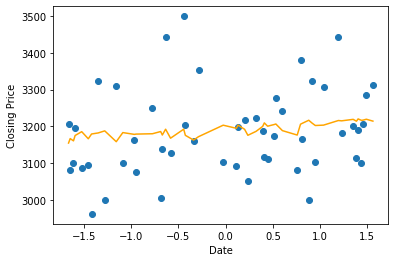

In [29]:
X_plot = X_test[:,0]
y_plot= y_pred
plt.plot(X_plot,y_plot,color='orange')
plt.scatter(X_plot,y_test)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()